In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
data = pd.read_csv("drug200.csv")
data.head(5)

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The sodium/potassium adenosine-triphosphatase (Na+/K+-ATPase) is an essential plasma membrane enzyme that maintains ion homeostasis, cell volume and contractility, electrical signaling, membrane trafficking and vascular tone (7). The Na+/K+-ATPase is the target of several controlling mechanisms.

In [40]:
le = LabelEncoder()

In [41]:
data['gender'] = le.fit_transform(data['gender'])

In [42]:
data['BP'] = le.fit_transform(data['BP'])

In [43]:
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

In [44]:
data.head(5)

,Age,gender,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [45]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.8, random_state = 0)

In [73]:
drugTree = DecisionTreeClassifier(criterion="gini",max_depth = 4)

In [74]:
model = drugTree.fit(X_train, y_train)

In [75]:
y_pred = drugTree.predict(X_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

1.0

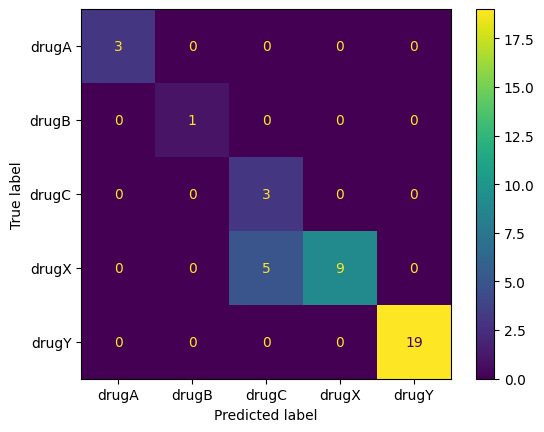

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [20]:
from sklearn import tree

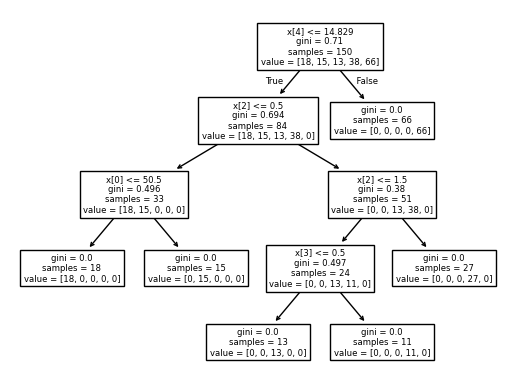

In [21]:
tree.plot_tree(model)
plt.show()

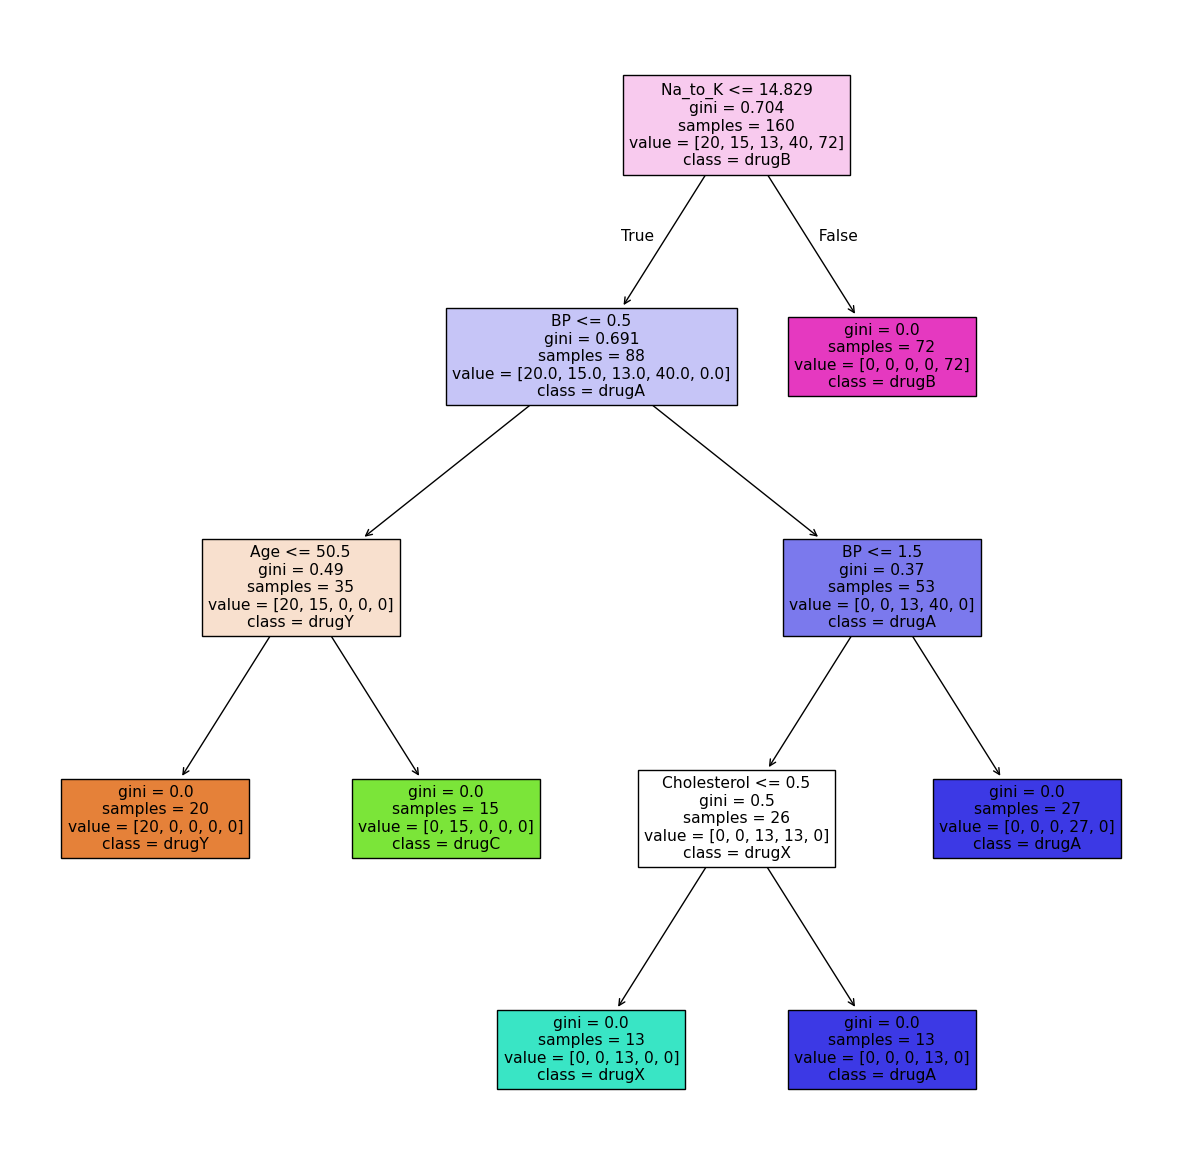

In [77]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model,
                   feature_names= data.columns,
                   class_names= data.Drug.unique(),
                   filled=True)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
classifier = RandomForestClassifier(n_estimators = 2, criterion = 'gini', random_state = 0)

In [63]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.98